In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.io import loadmat 
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.interpolate import spline

mat_dict = loadmat('/Users/carl/Dropbox/Docs/Python/PyCharm/TRIED_TP2b/clim_t2C_J1982D2010.mat')
clim_t2 = mat_dict['clim_t2']

# find out what type is in the dict
if isinstance(clim_t2, list):
    print('list')
elif isinstance(clim_t2, np.ndarray):
    print('ndarray')
else:
    print('something else')
    
print(np.shape(clim_t2))

ndarray
(348, 11)


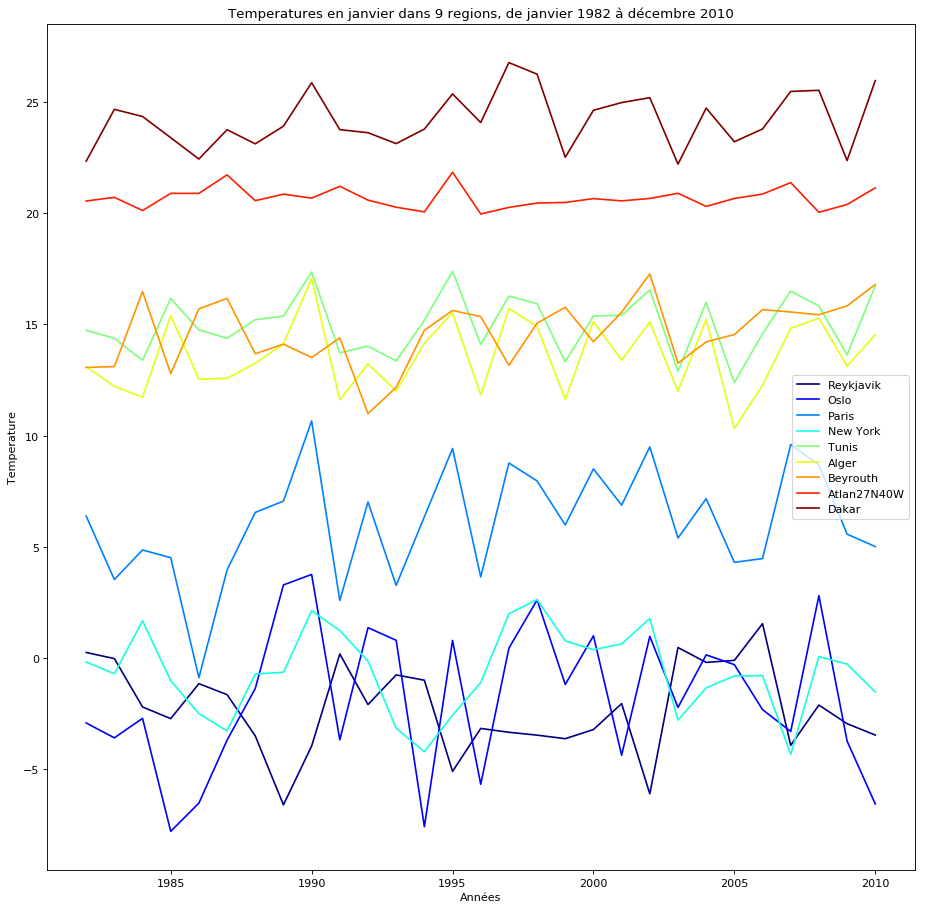

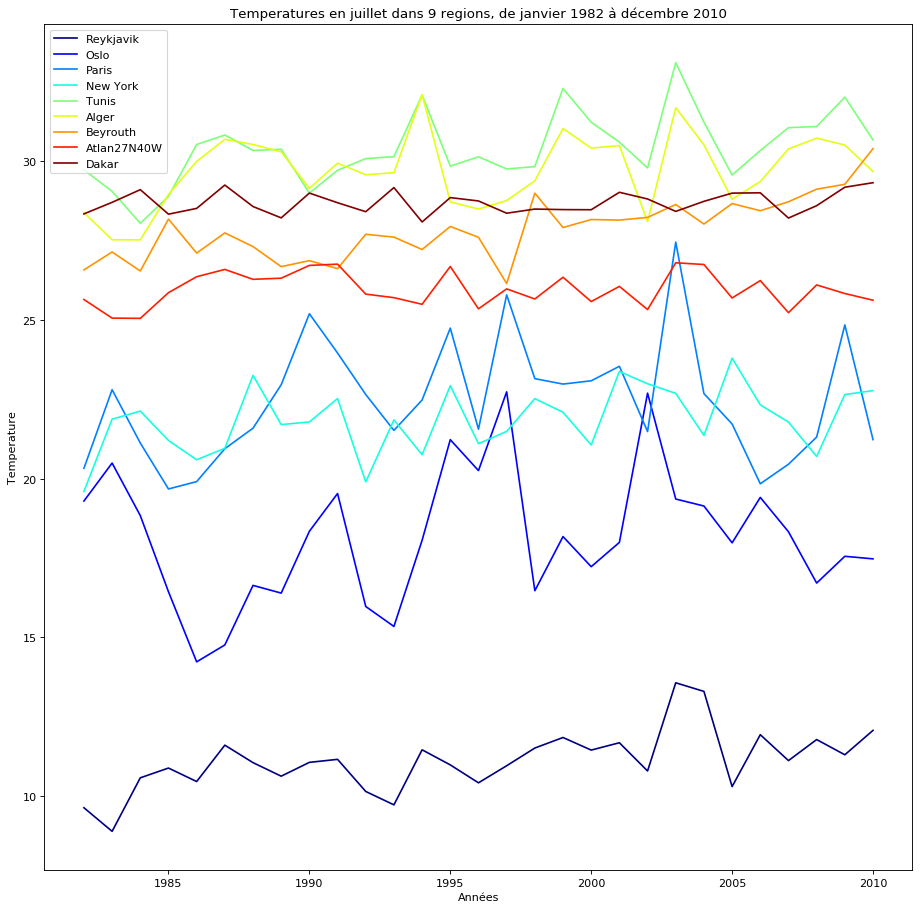

In [59]:
# set up values for graphs
ville = ['Reykjavik', 'Oslo', 'Paris', 'New York', 'Tunis', 'Alger', 'Beyrouth', 'Atlan27N40W', 'Dakar']
values = range(9)
# print(values)
jet = plt.get_cmap('jet') 
cNorm = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

# create new figure
plt.figure(num=None, figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')
plt.title('Temperatures en janvier dans 9 regions, de janvier 1982 à décembre 2010')
plt.ylabel('Temperature')
plt.xlabel('Années')

for i in values:
    colorVal = scalarMap.to_rgba(values[i])
    plt.plot(clim_t2[1::12,0], clim_t2[1::12,i+2], color=colorVal, label=ville[i])
plt.legend()
plt.show()

# create new figure
plt.figure(num=None, figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')
plt.title('Temperatures en juillet dans 9 regions, de janvier 1982 à décembre 2010')
plt.ylabel('Temperature')
plt.xlabel('Années')

for i in values:
    colorVal = scalarMap.to_rgba(values[i])
    plt.plot(clim_t2[7::12,0], clim_t2[7::12,i+2], color=colorVal, label=ville[i])
plt.legend()
plt.show()

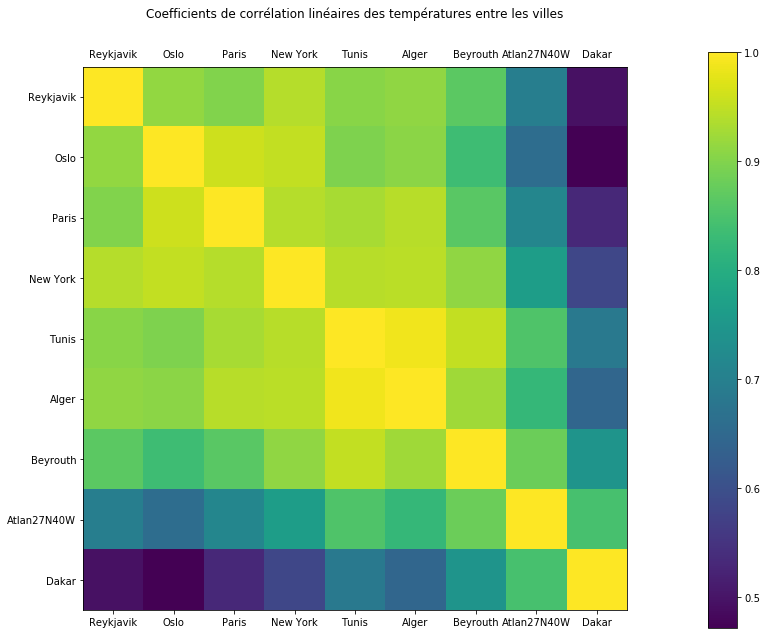

In [70]:
# coef_table = np.zeros((np.size(clim_t2, 0), np.size(clim_t2, 0)))
coef_2d_list = []
# print(np.shape(coef_table))

# for each town1
for index1 in np.arange(len(ville)):
    # create an empty list to add corr values into
    inner_list = []
    # get column of temp data
    clim_ville1 = clim_t2[:, index1 + 2]
    # for each town2
    for index2 in np.arange(len(ville)):
        # get column of temp data 
        clim_ville2 = clim_t2[:, index2 + 2]
        # get correlation coefficient matrix between the two towns
        corr = np.corrcoef(clim_ville1, clim_ville2)
        # append correlation value to the inner list
        inner_list.append(corr[0,1])
        # print(corr[0,1])
    # append the inner list to the main list
    coef_2d_list.append(inner_list)
    coef_2d_array = np.array(coef_2d_list)

fig = plt.figure(figsize=(14, 10), facecolor='w')

ax = fig.add_subplot(111)
ax.set_title('Coefficients de corrélation linéaires des températures entre les villes', y=1.08)
plt.imshow(coef_2d_array)
ax.set_aspect('equal')
ville_ax = list(ville)
ville_ax.insert(0,'')

# print(ville_ax)
ax.set_xticklabels(ville_ax)
ax.xaxis.set_tick_params(labeltop='on')
ax.set_yticklabels(ville_ax)

cax = fig.add_axes([0.2, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()
